In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np

In [26]:
CreditRecord = pd.read_csv('/content/credit_record.csv')
appRecord = pd.read_csv('/content/application_record.csv')

In [27]:
print(CreditRecord.shape, appRecord.shape)


(1048575, 3) (389223, 18)


In [28]:
CreditRecord.head(5)


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [29]:
CreditRecord['MONTHS_BALANCE'].value_counts()


,count
MONTHS_BALANCE,
-1,34436
-2,34209
0,33856
-3,33854
-4,33365
...,...
-56,2109
-57,1649
-58,1255


In [30]:
appRecord.head(5)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0


In [31]:
for column in appRecord.columns:
    if column != 'AMT_INCOME_TOTAL':
        print(pd.unique(appRecord[column]))

[5008804 5008805 5008806 ... 6651048 6651049 6651050]
['M' 'F']
['Y' 'N']
['Y' 'N']
[ 0  1  3  2  4  5 14 19  7  9 12  6]
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree' 'Secondary / secondary specia']
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow' nan]
['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment' nan]
[-12005. -21474. -19110. ... -24692. -20214.     nan]
[-4542. -1134. -3051. ... -7822. -3979.    nan]
[ 1. nan]
[ 1.  0. nan]
[ 0.  1. nan]
[ 0.  1. nan]
[nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']
[ 2.  1.  5.  3.  4.

In [32]:
CreditRecord['STATUS'].value_counts()


,count
STATUS,
C,442031
0,383120
X,209230
1,11090
5,1693
2,868
3,320
4,223


In [33]:
appRecord.isna().sum()


,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,1
NAME_HOUSING_TYPE,1


<Axes: xlabel='STATUS', ylabel='MONTHS_BALANCE'>

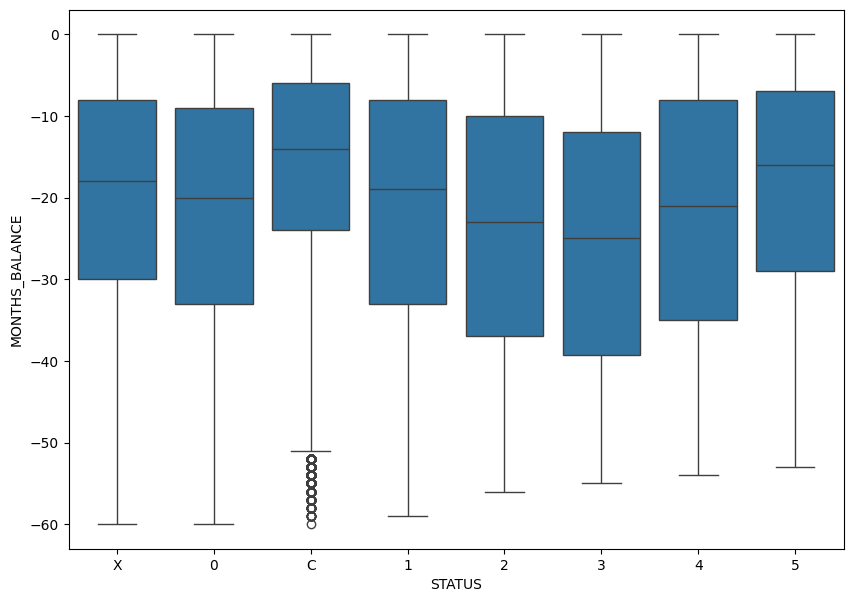

In [34]:
plt.figure(figsize=(10, 7))
sns.boxplot(x=CreditRecord['STATUS'], y=CreditRecord['MONTHS_BALANCE'])

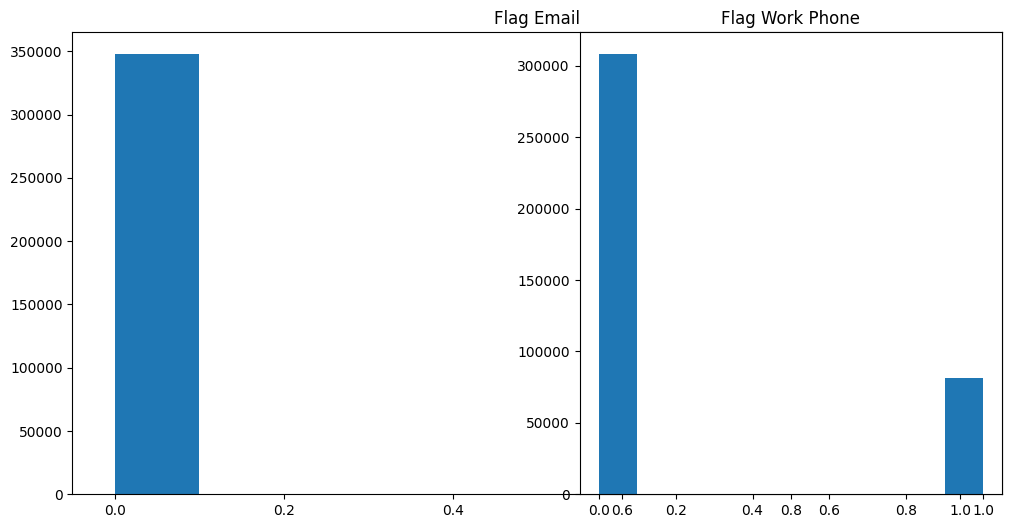

In [35]:
fig = plt.figure(figsize=(5, 3))

ax_1 = fig.add_subplot(1, 1, 1)
ax_2 = fig.add_subplot(1, 2, 2)

ax_1.hist(appRecord['FLAG_EMAIL'])
ax_1.set_title("Flag Email")

ax_2.hist(appRecord['FLAG_WORK_PHONE'])
ax_2.set_title("Flag Work Phone")
fig.set_size_inches(12,6)
plt.show()


In [36]:
appRecord.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389223 entries, 0 to 389222
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   389223 non-null  int64  
 1   CODE_GENDER          389223 non-null  object 
 2   FLAG_OWN_CAR         389223 non-null  object 
 3   FLAG_OWN_REALTY      389223 non-null  object 
 4   CNT_CHILDREN         389223 non-null  int64  
 5   AMT_INCOME_TOTAL     389223 non-null  float64
 6   NAME_INCOME_TYPE     389223 non-null  object 
 7   NAME_EDUCATION_TYPE  389223 non-null  object 
 8   NAME_FAMILY_STATUS   389222 non-null  object 
 9   NAME_HOUSING_TYPE    389222 non-null  object 
 10  DAYS_BIRTH           389222 non-null  float64
 11  DAYS_EMPLOYED        389222 non-null  float64
 12  FLAG_MOBIL           389222 non-null  float64
 13  FLAG_WORK_PHONE      389222 non-null  float64
 14  FLAG_PHONE           389222 non-null  float64
 15  FLAG_EMAIL       

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

objectColumns = ["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE"]
for objColumn in objectColumns:
    label = LabelEncoder()
    appRecord[objColumn] = label.fit_transform(appRecord[objColumn].values)

In [38]:
Ocupation_dict = {'Security staff':0, 'Sales staff':1,
                  'Accountants':2, 'Laborers':3,
                  'Managers':4,'Drivers':5,
                  'Core staff':6, 'High skill tech staff':7,
                  'Cleaning staff':8,'Private service staff':9,
                  'Cooking staff':10, 'Low-skill Laborers':11,
                  'Medicine staff':12, 'Secretaries':13,
                  'Waiters/barmen staff':14, 'HR staff':15,
                  'Realty agents':16, "IT staff":17}

appRecord['OCCUPATION_TYPE'] = appRecord['OCCUPATION_TYPE'].map(Ocupation_dict)

In [39]:
appRecord.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'], inplace=True, axis=1)

In [40]:
map_status = {'C' : 1,
              'X' : 1,
              '0' : 1,
              '1' : 0,
              '2' : 0,
              '3' : 0,
              '4' : 0,
              '5' : 0}
CreditRecord["STATUS"] = CreditRecord['STATUS'].map(map_status)

In [41]:
CreditRecord['STATUS'].value_counts()


,count
STATUS,
1,1034381
0,14194


In [42]:
df_credit = appRecord.merge(CreditRecord, how='inner', on=['ID'])
df_credit.head(6)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,1.0,1.0,0.0,0.0,NaN,2.0,0,1
1,5008804,1,1,1,0,427500.0,4,1,0,4,1.0,1.0,0.0,0.0,NaN,2.0,-1,1
2,5008804,1,1,1,0,427500.0,4,1,0,4,1.0,1.0,0.0,0.0,NaN,2.0,-2,1
3,5008804,1,1,1,0,427500.0,4,1,0,4,1.0,1.0,0.0,0.0,NaN,2.0,-3,1
4,5008804,1,1,1,0,427500.0,4,1,0,4,1.0,1.0,0.0,0.0,NaN,2.0,-4,1
5,5008804,1,1,1,0,427500.0,4,1,0,4,1.0,1.0,0.0,0.0,NaN,2.0,-5,1


In [43]:
from sklearn.model_selection import train_test_split

target = df_credit['STATUS']
features = df_credit.drop(['STATUS'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.75)

In [44]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('lr', LogisticRegression())
])

In [ ]:
grid_param = {
    'lr__solver': ['liblinear'],
    'lr__C': np.logspace(-4, 4, 20),
    'lr__penalty': ["l1", "l2"]
}

grid_search = GridSearchCV(pipeline, param_grid=grid_param, n_jobs=-1, cv=4, return_train_score=True, scoring='roc_auc')
grid_search.fit(X_train, y_train.values.ravel())

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_score_

In [ ]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, ConfusionMatrixDisplay, confusion_matrix

prediction = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, prediction)

In [ ]:
precision, recall, th = precision_recall_curve(y_test, prediction)
plt.plot(recall, precision, marker='.')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("ROC-AUC")
plt.legend()
plt.show()

In [ ]:
pipelineKNN = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("knn", KNeighborsClassifier())
])

In [ ]:
grid_knn_param = {
    'knn__weights': ['uniform', 'distance'],
    'knn__n_neighbors': range(2, 8)
}

grid_search_KNN = GridSearchCV(pipelineKNN, param_grid=grid_knn_param, n_jobs=-1, cv=5, scoring='roc_auc')
grid_search_KNN.fit(X_train, y_train.values.ravel())

In [ ]:
grid_search_KNN.best_estimator_

In [ ]:
predictionKNN = grid_search_KNN.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, predictionKNN)

In [ ]:
precision, recall, th = precision_recall_curve(y_test, predictionKNN)
plt.plot(recall, precision, marker='.')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("ROC-AUC")
plt.legend()
plt.show()

In [ ]:
pipelineForest = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('forest', RandomForestClassifier())
])

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X_train)
X_train = imputer.transform(X_train)

In [ ]:
imputer.fit(X_test)
X_test = imputer.transform(X_test)


In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest.score(X_train, y_train)

In [ ]:
predictionForest = forest.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, predictionForest)

In [ ]:
precision, recall, th = precision_recall_curve(y_test, predictionForest)
plt.plot(recall, precision, marker='.')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("ROC-AUC")
plt.legend()
plt.show()

In [ ]:
pipelineTree = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('tree', DecisionTreeClassifier())
])

In [ ]:
grid_tree_params = {
    'tree__max_depth': [7, 9, 11, 13],
    'tree__min_samples_leaf': [8, 10, 12, 15]
}

In [ ]:
grid_search_tree = GridSearchCV(pipelineTree, param_grid=grid_tree_params, n_jobs=-1, cv=5, scoring='roc_auc')
grid_search_tree.fit(X_train, y_train.values.ravel())

In [ ]:
predictionTree = grid_search_tree.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, predictionTree)

In [ ]:
precision, recall, th = precision_recall_curve(y_test, predictionTree)
plt.plot(recall, precision, marker='.')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("ROC-AUC")
plt.legend()
plt.show()

In [ ]:
boost = GradientBoostingClassifier(n_estimators=200, max_depth=10)
boost.fit(X_train, y_train)

In [ ]:
predictionBoost = boost.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, predictionBoost)

In [ ]:
precision, recall, th = precision_recall_curve(y_test, predictionBoost)
plt.plot(recall, precision, marker='.')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("ROC-AUC")
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4), n_estimators=250)
adaBoost.fit(X_train, y_train)

In [ ]:
predictionAda = adaBoost.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, predictionAda)

In [ ]:
precision, recall, th = precision_recall_curve(y_test, predictionAda)
plt.plot(recall, precision, marker='.')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("ROC-AUC")
plt.legend()
plt.show()